STAKEHOLDER:
The primary stakeholder is the City of Chicago who's interest to evaluate major causes of clashes and monitor the pattern in relation to  various conditions that seam to increase the occurence of accidents

BUSINESS PROBLEM:
The business problem ts to determining the major causes of crashes in Chicago



In [ ]:
POSSIBLE QUESTIONS 
 How many accidents happens each day  each month of the year 
 Who are the most casualities drivers or pedestrians, gender, age .what location records most accidents .what are the major factors causing accidents (weather, time of the day(day/night),car make, car model, traffic control presence,condition of the traffic control, speed,ROAD_DEFECT)

total number of crashes for a specic period of time,
what cars  crash more (model)
what season do we have more crashes  weather/ time



possible question
.how many accidents happens each day , each month of the year
.who are the most casualities drivers or pedestrians, gender, age
.what location records most accidents
.what are the major factors causing accidents
(weather, time of the day(day/night),car make, car model, traffic control presence,condition of the traffic control, speed,ROAD_DEFECT)

In [404]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [267]:
# load the traffic crashes dataset

Crashes = pd.read_csv("Traffic_Crashes_-_Crashes_20240208.csv", low_memory=False, index_col=None)
Crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [268]:
# checking the null values in the dataset
Crashes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804163 entries, 0 to 804162
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                804163 non-null  object 
 1   CRASH_DATE_EST_I               60229 non-null   object 
 2   CRASH_DATE                     804163 non-null  object 
 3   POSTED_SPEED_LIMIT             804163 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         804163 non-null  object 
 5   DEVICE_CONDITION               804163 non-null  object 
 6   WEATHER_CONDITION              804163 non-null  object 
 7   LIGHTING_CONDITION             804163 non-null  object 
 8   FIRST_CRASH_TYPE               804163 non-null  object 
 9   TRAFFICWAY_TYPE                804163 non-null  object 
 10  LANE_CNT                       199007 non-null  float64
 11  ALIGNMENT                      804163 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [269]:
# dropping columns with the highest null values and will not have effect in our model
columns_drop = ['LONGITUDE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','LATITUDE','WORKERS_PRESENT_I','WORK_ZONE_TYPE','WORK_ZONE_I', 'DOORING_I','PHOTOS_TAKEN_I','CRASH_DATE_EST_I', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','LANE_CNT','ALIGNMENT','ROADWAY_SURFACE_COND','REPORT_TYPE', 'DATE_POLICE_NOTIFIED','STREET_DIRECTION','STREET_NO','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','STATEMENTS_TAKEN_I','NUM_UNITS']
Crashes2 = Crashes.drop(columns=columns_drop)
Crashes2.head(5)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NAME,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,WENTWORTH AVE,INCAPACITATING INJURY,3.0,19,3,9,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,CHICAGO SKYWAY OB,NO INDICATION OF INJURY,0.0,18,6,9,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",ASHLAND AVE,NO INDICATION OF INJURY,0.0,14,7,7,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,BALMORAL AVE,NO INDICATION OF INJURY,0.0,23,4,8,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,OHARE ST,NONINCAPACITATING INJURY,1.0,12,6,8,NaN


In [270]:
# checking the null values after cleaning
Crashes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804163 entries, 0 to 804162
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          804163 non-null  object 
 1   CRASH_DATE               804163 non-null  object 
 2   POSTED_SPEED_LIMIT       804163 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   804163 non-null  object 
 4   DEVICE_CONDITION         804163 non-null  object 
 5   WEATHER_CONDITION        804163 non-null  object 
 6   LIGHTING_CONDITION       804163 non-null  object 
 7   ROAD_DEFECT              804163 non-null  object 
 8   CRASH_TYPE               804163 non-null  object 
 9   DAMAGE                   804163 non-null  object 
 10  PRIM_CONTRIBUTORY_CAUSE  804163 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE   804163 non-null  object 
 12  STREET_NAME              804162 non-null  object 
 13  MOST_SEVERE_INJURY       802392 non-null  object 
 14  INJU

In [271]:
# dropping rows in location that have nullvalues
Crashes3 = Crashes2.dropna(subset = ['LOCATION'])

In [272]:
# checking the final values of the dataset and datatypes
Crashes3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798674 entries, 2 to 804162
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          798674 non-null  object 
 1   CRASH_DATE               798674 non-null  object 
 2   POSTED_SPEED_LIMIT       798674 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   798674 non-null  object 
 4   DEVICE_CONDITION         798674 non-null  object 
 5   WEATHER_CONDITION        798674 non-null  object 
 6   LIGHTING_CONDITION       798674 non-null  object 
 7   ROAD_DEFECT              798674 non-null  object 
 8   CRASH_TYPE               798674 non-null  object 
 9   DAMAGE                   798674 non-null  object 
 10  PRIM_CONTRIBUTORY_CAUSE  798674 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE   798674 non-null  object 
 12  STREET_NAME              798674 non-null  object 
 13  MOST_SEVERE_INJURY       796915 non-null  object 
 14  INJURIES_

In [273]:
# loading the second dataset of vehicles involved in accidents
Vehicles = pd.read_csv("Traffic_Crashes_-_Vehicles_20240208.csv", low_memory=False, index_col=None)
Vehicles.head()

ParserError: Error tokenizing data. C error: out of memory

In [345]:
# checking the null values
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 71 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1640449 non-null  int64  
 1   CRASH_RECORD_ID           1640449 non-null  object 
 2   CRASH_DATE                1640449 non-null  object 
 3   UNIT_NO                   1640449 non-null  int64  
 4   UNIT_TYPE                 1638343 non-null  object 
 5   NUM_PASSENGERS            242654 non-null   float64
 6   VEHICLE_ID                1602902 non-null  float64
 7   CMRC_VEH_I                30550 non-null    object 
 8   MAKE                      1602897 non-null  object 
 9   MODEL                     1602752 non-null  object 
 10  LIC_PLATE_STATE           1455956 non-null  object 
 11  VEHICLE_YEAR              1344942 non-null  float64
 12  VEHICLE_DEFECT            1602902 non-null  object 
 13  VEHICLE_TYPE              1

In [346]:
# dropping columns that have the highest null values 
columns_drop = ['HAZMAT_CLASS','MCS_OUT_OF_SERVICE_I','HAZMAT_OUT_OF_SERVICE_I','LOAD_TYPE','CARGO_BODY_TYPE','VEHICLE_CONFIG','AXLE_CNT','TOTAL_VEHICLE_LENGTH','TRAILER2_LENGTH','TRAILER1_LENGTH','TRAILER2_WIDTH','TRAILER1_WIDTH','WIDE_LOAD_I','IDOT_PERMIT_NO','MCS_VIO_CAUSE_CRASH_I','HAZMAT_VIO_CAUSE_CRASH_I','MCS_REPORT_NO','MCS_REPORT_I','HAZMAT_REPORT_NO','HAZMAT_REPORT_I','HAZMAT_PRESENT_I','UN_NO','HAZMAT_NAME','HAZMAT_PLACARDS_I','CARRIER_CITY','CARRIER_STATE','CARRIER_NAME','GVWR','COMMERCIAL_SRC','ILCC_NO','CCMC_NO','USDOT_NO','CMV_ID','EXCEED_SPEED_LIMIT_I','TOWED_BY','TOWED_TO', 'AREA_00_I','AREA_01_I','AREA_02_I','AREA_03_I','AREA_04_I','AREA_05_I','AREA_06_I','AREA_07_I','AREA_08_I','AREA_09_I','AREA_10_I','AREA_11_I','AREA_12_I','AREA_99_I','FIRE_I','TRAVEL_DIRECTION','LIC_PLATE_STATE','CMRC_VEH_I','NUM_PASSENGERS','CRASH_UNIT_ID','TOWED_I','CRASH_DATE','FIRST_CONTACT_POINT']
Vehicles2 = Vehicles.drop(columns=columns_drop)
Vehicles2.head(5)

,CRASH_RECORD_ID,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT
0,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,1,DRIVER,1634931.0,NISSAN,SENTRA,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,SLOW/STOP IN TRAFFIC,1.0
2,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2,DRIVER,1634978.0,CHRYSLER,SEBRING,2010.0,NONE,PASSENGER,PERSONAL,PASSING/OVERTAKING,1.0
3,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,1,DRIVER,1634948.0,SUBARU,OUTBACK,2015.0,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,1.0
4,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1,DRIVER,1637401.0,TOYOTA,RAV4,2018.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0


In [347]:
# checking the dataset after dropping the null columns
Vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CRASH_RECORD_ID  1640449 non-null  object 
 1   UNIT_NO          1640449 non-null  int64  
 2   UNIT_TYPE        1638343 non-null  object 
 3   VEHICLE_ID       1602902 non-null  float64
 4   MAKE             1602897 non-null  object 
 5   MODEL            1602752 non-null  object 
 6   VEHICLE_YEAR     1344942 non-null  float64
 7   VEHICLE_DEFECT   1602902 non-null  object 
 8   VEHICLE_TYPE     1602902 non-null  object 
 9   VEHICLE_USE      1602902 non-null  object 
 10  MANEUVER         1602902 non-null  object 
 11  OCCUPANT_CNT     1602902 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 150.2+ MB


In [348]:
# dropping the rows in the vehicle year that have null values
Vehicles3 = Vehicles2.dropna(subset = ['VEHICLE_YEAR'])

In [275]:
# checking the cleaned dataset datatypes
Vehicles3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344942 entries, 1 to 1640447
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CRASH_RECORD_ID  1344942 non-null  object 
 1   UNIT_NO          1344942 non-null  int64  
 2   UNIT_TYPE        1344932 non-null  object 
 3   VEHICLE_ID       1344942 non-null  float64
 4   MAKE             1344937 non-null  object 
 5   MODEL            1344805 non-null  object 
 6   VEHICLE_YEAR     1344942 non-null  float64
 7   VEHICLE_DEFECT   1344942 non-null  object 
 8   VEHICLE_TYPE     1344942 non-null  object 
 9   VEHICLE_USE      1344942 non-null  object 
 10  MANEUVER         1344942 non-null  object 
 11  OCCUPANT_CNT     1344942 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 133.4+ MB


In [276]:
# loading the people involved in accidents dataset
People = pd.read_csv("Traffic_Crashes_-_People_20240208.csv", low_memory=False, index_col=None)
People.head()

ParserError: Error tokenizing data. C error: out of memory

In [349]:
# checking the dataset shape
People.shape

(1765148, 29)

In [350]:
# checking the datatypes of the dataset
People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765148 entries, 0 to 1765147
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [277]:
# checking the null values in the dataset
#get the count of null values in each column:
null_summary = People.isnull().sum()
data_types = People.dtypes
# Combine null values and data types into a summary DataFrame
summary_People = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
VEHICLE_ID                   35294    float64
CRASH_DATE                       0     object
SEAT_NO                    1408309    float64
CITY                        479735     object
STATE                       461035     object
ZIPCODE                     586327     object
SEX                          29048     object
AGE                         515185    float64
DRIVERS_LICENSE_STATE       730369     object
DRIVERS_LICENSE_CLASS       898888     object
SAFETY_EQUIPMENT              4924     object
AIRBAG_DEPLOYED              33947     object
EJECTION                     21835     object
INJURY_CLASSIFICATION          718     object
HOSPITAL                   1471525     object
EMS_AGENCY                 1583351     object
EMS_RUN_NO                 1735026     object
DRIVER_ACTION               360007

In [278]:
# dropping the columns with the highest null values
columns_drop = ['CELL_PHONE_USE','BAC_RESULT VALUE','BAC_RESULT','PEDPEDAL_LOCATION','PEDPEDAL_VISIBILITY','PEDPEDAL_ACTION','EMS_RUN_NO','EMS_AGENCY','HOSPITAL','SEAT_NO','VEHICLE_ID','ZIPCODE','CRASH_DATE']
People2 = People.drop(columns=columns_drop)
People2.head(5)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,CHICAGO,IL,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,CHICAGO,IL,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN


In [351]:
# checking the nullvalues again after dropping the highest numbers
null_summary = People2.isnull().sum()
data_types = People2.dtypes
# Combine null values and data types into a summary DataFrame
summary_People2 = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People2)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
CITY                        479735     object
STATE                       461035     object
SEX                          29048     object
AGE                         515185    float64
DRIVERS_LICENSE_STATE       730369     object
DRIVERS_LICENSE_CLASS       898888     object
SAFETY_EQUIPMENT              4924     object
AIRBAG_DEPLOYED              33947     object
EJECTION                     21835     object
INJURY_CLASSIFICATION          718     object
DRIVER_ACTION               360007     object
DRIVER_VISION               360529     object
PHYSICAL_CONDITION          359047     object


In [352]:
# dropping the null rows in the selected columns 
People3 = People2.dropna(subset = ['DRIVERS_LICENSE_CLASS','AGE','CITY','STATE','DRIVERS_LICENSE_STATE'])

In [353]:
# checking the null values
null_summary = People3.isnull().sum()
data_types = People3.dtypes
# Combine null values and data types into a summary DataFrame
summary_People3 = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People3)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
CITY                             0     object
STATE                            0     object
SEX                              0     object
AGE                              0    float64
DRIVERS_LICENSE_STATE            0     object
DRIVERS_LICENSE_CLASS            0     object
SAFETY_EQUIPMENT                 1     object
AIRBAG_DEPLOYED                  1     object
EJECTION                         1     object
INJURY_CLASSIFICATION            0     object
DRIVER_ACTION                    0     object
DRIVER_VISION                    0     object
PHYSICAL_CONDITION               1     object


In [354]:
# preview the columns in the cleaned crahes dataset
Crashes3.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION'],
      dtype='object')

In [355]:
# preview the columns in the cleaned people dataset
People3.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION'],
      dtype='object')

In [356]:
# preview the columns in the cleaned vehicles dataset
Vehicles3.columns

Index(['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [357]:
# merge the cleaned datasets
# mergedcrashes = pd.merge(Crashes3,People3 on='CRASH_RECORD_ID')
mergecrashes = People3.merge(Crashes3,on='CRASH_RECORD_ID', how='left')


In [358]:
# merge the cleaned datasets
mergecrashes1 = mergecrashes.merge(Vehicles3,on='CRASH_RECORD_ID', how='left')
mergecrashes1.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [359]:
# check for nullvalues in the merged dataset
mergecrashes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553246 entries, 0 to 1553245
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PERSON_ID                1553246 non-null  object 
 1   PERSON_TYPE              1553246 non-null  object 
 2   CRASH_RECORD_ID          1553246 non-null  object 
 3   CITY                     1553246 non-null  object 
 4   STATE                    1553246 non-null  object 
 5   SEX                      1553246 non-null  object 
 6   AGE                      1553246 non-null  float64
 7   DRIVERS_LICENSE_STATE    1553246 non-null  object 
 8   DRIVERS_LICENSE_CLASS    1553246 non-null  object 
 9   SAFETY_EQUIPMENT         1553244 non-null  object 
 10  AIRBAG_DEPLOYED          1553245 non-null  object 
 11  EJECTION                 1553245 non-null  object 
 12  INJURY_CLASSIFICATION    1553246 non-null  object 
 13  DRIVER_ACTION            1553246 non-null 

In [360]:
# Dropping the rows with null values
mergecrashes2 = mergecrashes1.dropna(subset = ['MODEL','MAKE','SAFETY_EQUIPMENT','UNIT_TYPE','AIRBAG_DEPLOYED','EJECTION','PHYSICAL_CONDITION','POSTED_SPEED_LIMIT'])

In [361]:
# checking if the dataset is clear of null values
mergecrashes2.isna().sum()

PERSON_ID                  0
PERSON_TYPE                0
CRASH_RECORD_ID            0
CITY                       0
STATE                      0
SEX                        0
AGE                        0
DRIVERS_LICENSE_STATE      0
DRIVERS_LICENSE_CLASS      0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
DRIVER_VISION              0
PHYSICAL_CONDITION         0
CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NAME                0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LOCATION                   0
UNIT_NO       

In [362]:
# shape of the dataset 
mergecrashes2.shape

(1530593, 45)

In [363]:
# preview the dataset columns
mergecrashes2.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [364]:
# removing duplicates
chicagocrush = mergecrashes2.drop_duplicates(subset=['CRASH_RECORD_ID'])

In [365]:
# preview of the final dataset to be used in modelling
chicagocrush.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,...,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,CHICAGO,IL,M,25.0,IL,D,NONE PRESENT,...,DRIVER,834816.0,HONDA,CIVIC,2016.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0
3,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,CHICAGO,IL,F,34.0,IL,D,SAFETY BELT USED,...,DRIVER,805348.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2001.0,UNKNOWN,PASSENGER,PERSONAL,MERGING,1.0
5,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,CHICAGO,IL,M,53.0,IL,B,SAFETY BELT USED,...,DRIVER,832624.0,NEW FLYER,NEW FLYER,2007.0,UNKNOWN,BUS OVER 15 PASS.,CTA,TURNING LEFT,1.0
8,O879685,DRIVER,cb7e25c6e63094307e5b999a8a5ec6f781a54781aeaef3...,MELROSE PARK,IL,M,33.0,IL,D,USAGE UNKNOWN,...,DRIVER,834563.0,HONDA,ACCORD,2003.0,UNKNOWN,PASSENGER,PERSONAL,AVOIDING VEHICLES/OBJECTS,1.0
10,O880033,DRIVER,2bdb105a834f9917ee9be1937302d775525192c91e7398...,CARBONDALE,IL,M,22.0,IL,D,SAFETY BELT USED,...,DRIVER,834906.0,TOYOTA,AVALON,2006.0,NONE,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0


In [366]:
# checking for null values
chicagocrush.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529191 entries, 0 to 1553242
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_ID                529191 non-null  object 
 1   PERSON_TYPE              529191 non-null  object 
 2   CRASH_RECORD_ID          529191 non-null  object 
 3   CITY                     529191 non-null  object 
 4   STATE                    529191 non-null  object 
 5   SEX                      529191 non-null  object 
 6   AGE                      529191 non-null  float64
 7   DRIVERS_LICENSE_STATE    529191 non-null  object 
 8   DRIVERS_LICENSE_CLASS    529191 non-null  object 
 9   SAFETY_EQUIPMENT         529191 non-null  object 
 10  AIRBAG_DEPLOYED          529191 non-null  object 
 11  EJECTION                 529191 non-null  object 
 12  INJURY_CLASSIFICATION    529191 non-null  object 
 13  DRIVER_ACTION            529191 non-null  object 
 14  DRIVER_V

In [367]:
# dropping irrelevant columns in the merged dataset
columns_drop = ['PERSON_ID','PERSON_TYPE','DRIVERS_LICENSE_STATE','DRIVERS_LICENSE_CLASS','SAFETY_EQUIPMENT','OCCUPANT_CNT']
chicagocrush1 = chicagocrush.drop(columns=columns_drop)
chicagocrush1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529191 entries, 0 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          529191 non-null  object 
 1   CITY                     529191 non-null  object 
 2   STATE                    529191 non-null  object 
 3   SEX                      529191 non-null  object 
 4   AGE                      529191 non-null  float64
 5   AIRBAG_DEPLOYED          529191 non-null  object 
 6   EJECTION                 529191 non-null  object 
 7   INJURY_CLASSIFICATION    529191 non-null  object 
 8   DRIVER_ACTION            529191 non-null  object 
 9   DRIVER_VISION            529191 non-null  object 
 10  PHYSICAL_CONDITION       529191 non-null  object 
 11  CRASH_DATE               529191 non-null  object 
 12  POSTED_SPEED_LIMIT       529191 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   529191 non-null  object 
 14  DEVICE_C

In [368]:

chicagocrush1.INJURIES_TOTAL.value_counts()

INJURIES_TOTAL
0.0     448008
1.0      58859
2.0      15002
3.0       4653
4.0       1653
5.0        596
6.0        229
7.0         88
8.0         42
9.0         22
10.0        14
11.0         7
15.0         6
12.0         4
21.0         2
13.0         2
19.0         1
16.0         1
17.0         1
14.0         1
Name: count, dtype: int64

In [369]:
chicagocrush1.TRAFFIC_CONTROL_DEVICE.value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 264147
TRAFFIC SIGNAL              178150
STOP SIGN/FLASHER            61296
UNKNOWN                      17351
OTHER                         3541
LANE USE MARKING               950
YIELD                          887
OTHER REG. SIGN                600
OTHER WARNING SIGN             459
RAILROAD CROSSING GATE         405
PEDESTRIAN CROSSING SIGN       327
DELINEATORS                    213
FLASHING CONTROL SIGNAL        207
POLICE/FLAGMAN                 199
SCHOOL ZONE                    189
OTHER RAILROAD CROSSING        134
RR CROSSING SIGN                95
NO PASSING                      29
BICYCLE CROSSING SIGN           12
Name: count, dtype: int64

In [370]:
#  group different types of traffic control devices into a smaller set of categories
traffic_control_map = {
    'NO CONTROLS': 'No Controls',
    'TRAFFIC SIGNAL': 'Traffic Signal',
    'STOP SIGN/FLASHER': 'Stop Sign/Flasher',
    'UNKNOWN': 'Unknown/Other',
    'OTHER': 'Unknown/Other',
    'LANE USE MARKING': 'Traffic Signal',
    'YIELD': 'Unknown/Other',
    'OTHER REG. SIGN': 'Traffic Signal',
    'OTHER WARNING SIGN': 'Traffic Signal',
    'RAILROAD CROSSING GATE': 'Traffic Signal',
    'PEDESTRIAN CROSSING SIGN': 'Traffic Signal',
    'DELINEATORS': 'Traffic Signal',
    'FLASHING CONTROL SIGNAL': 'Traffic Signal',
    'POLICE/FLAGMAN': 'Traffic Signal',
    'SCHOOL ZONE': 'Traffic Signal',
    'OTHER RAILROAD CROSSING': 'Traffic Signal',
    'RR CROSSING SIGN': 'Traffic Signal',
    'NO PASSING': 'Traffic Signal',
    'BICYCLE CROSSING SIGN': 'Traffic Signal'
}

# Remap values in the 'TRAFFIC_CONTROL_DEVICE' column
chicagocrush1['TRAFFIC_CONTROL_DEVICE'] = chicagocrush1['TRAFFIC_CONTROL_DEVICE'].map(traffic_control_map)

# Check the updated value counts
print(chicagocrush1['TRAFFIC_CONTROL_DEVICE'].value_counts())


TRAFFIC_CONTROL_DEVICE
No Controls          264147
Traffic Signal       181969
Stop Sign/Flasher     61296
Unknown/Other         21779
Name: count, dtype: int64


In [371]:
chicagocrush1.VEHICLE_DEFECT.value_counts()

VEHICLE_DEFECT
NONE                293567
UNKNOWN             227658
BRAKES                3244
OTHER                 2884
TIRES                  539
STEERING               511
WHEELS                 264
SUSPENSION             197
ENGINE/MOTOR           103
FUEL SYSTEM             64
WINDOWS                 44
LIGHTS                  41
CARGO                   20
RESTRAINT SYSTEM        17
SIGNALS                 16
TRAILER COUPLING        14
EXHAUST                  8
Name: count, dtype: int64

In [372]:
chicagocrush1.WEATHER_CONDITION.value_counts()

WEATHER_CONDITION
CLEAR                       420448
RAIN                         50550
SNOW                         18690
CLOUDY/OVERCAST              17678
UNKNOWN                      16969
OTHER                         1674
FREEZING RAIN/DRIZZLE         1151
FOG/SMOKE/HAZE                 923
SLEET/HAIL                     733
BLOWING SNOW                   285
SEVERE CROSS WIND GATE          85
BLOWING SAND, SOIL, DIRT         5
Name: count, dtype: int64

In [373]:
# Define a dictionary map for remapping weather conditions
weather_condition_map = {
    'CLEAR': 'CLEAR',
    'RAIN': 'RAIN',
    'SNOW': 'SNOW',
    'CLOUDY/OVERCAST': 'CLOUDY',
    'UNKNOWN': 'CLEAR',
    'OTHER': 'CLEAR',
    'FREEZING RAIN/DRIZZLE': 'RAIN',
    'FOG/SMOKE/HAZE': 'FOG',
    'SLEET/HAIL': 'FOG',
    'BLOWING SNOW': 'FOG',
    'SEVERE CROSS WIND GATE': 'FOG',
    'BLOWING SAND, SOIL, DIRT': 'FOG'
}

# Remap values in the 'WEATHER_CONDITION' column using the defined map
chicagocrush1['WEATHER_CONDITION'] = chicagocrush1['WEATHER_CONDITION'].map(weather_condition_map)

# Check the updated value counts
weather_condition_counts = chicagocrush1['WEATHER_CONDITION'].value_counts()
print(weather_condition_counts)


WEATHER_CONDITION
CLEAR     439091
RAIN       51701
SNOW       18690
CLOUDY     17678
FOG         2031
Name: count, dtype: int64


In [374]:
chicagocrush1['CRASH_DATE'] = pd.to_datetime(chicagocrush1['CRASH_DATE'])

# Filter the data for the year 2023
Chicagocrush2023 = chicagocrush1[chicagocrush1['CRASH_DATE'].dt.year == 2023]

# Display the first few rows of the filtered DataFrame
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          68767 non-null  object        
 1   CITY                     68767 non-null  object        
 2   STATE                    68767 non-null  object        
 3   SEX                      68767 non-null  object        
 4   AGE                      68767 non-null  float64       
 5   AIRBAG_DEPLOYED          68767 non-null  object        
 6   EJECTION                 68767 non-null  object        
 7   INJURY_CLASSIFICATION    68767 non-null  object        
 8   DRIVER_ACTION            68767 non-null  object        
 9   DRIVER_VISION            68767 non-null  object        
 10  PHYSICAL_CONDITION       68767 non-null  object        
 11  CRASH_DATE               68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT       68767 no

In [375]:

# Encode categorical variables
label_encoder = LabelEncoder()

Chicagocrush2023.loc[:,'INJURY_CLASSIFICATION'] = label_encoder.fit_transform(Chicagocrush2023['INJURY_CLASSIFICATION'])
Chicagocrush2023.loc[:,'DRIVER_VISION'] = label_encoder.fit_transform(Chicagocrush2023['DRIVER_VISION'])
Chicagocrush2023.loc[:,'DRIVER_ACTION'] = label_encoder.fit_transform(Chicagocrush2023['DRIVER_ACTION'])
Chicagocrush2023.loc[:,'PHYSICAL_CONDITION'] = label_encoder.fit_transform(Chicagocrush2023['PHYSICAL_CONDITION'])
Chicagocrush2023.loc[:,'LIGHTING_CONDITION'] = label_encoder.fit_transform(Chicagocrush2023['LIGHTING_CONDITION'])
Chicagocrush2023.loc[:,'AIRBAG_DEPLOYED'] = label_encoder.fit_transform(Chicagocrush2023['AIRBAG_DEPLOYED'])
Chicagocrush2023.loc[:,'CITY'] = label_encoder.fit_transform(Chicagocrush2023['CITY'])
Chicagocrush2023.loc[:,'SEX'] = label_encoder.fit_transform(Chicagocrush2023['SEX'])
Chicagocrush2023.loc[:,'ROAD_DEFECT'] = label_encoder.fit_transform(Chicagocrush2023['ROAD_DEFECT'])
Chicagocrush2023.loc[:,'VEHICLE_USE'] = label_encoder.fit_transform(Chicagocrush2023['VEHICLE_USE'])


In [376]:
Chicagocrush2023.head()

,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER
324,a073a023f6713d0957a093f7e550175fd8699ec037c9d5...,222,CT,1,32.0,5,NONE,2,18,12,...,2.0,DRIVER,1640438.0,CHEVROLET,EQUINOX,2020.0,NONE,SPORT UTILITY VEHICLE (SUV),13,SLOW/STOP IN TRAFFIC
1389,c026bf2731fafc1ce64b302a52f58c9110627fca47541e...,384,IL,1,24.0,5,NONE,2,13,12,...,1.0,DRIVER,1492029.0,NISSAN,ALTIMA,2008.0,UNKNOWN,PASSENGER,13,SLOW/STOP IN TRAFFIC
27431,b51f3812261afa62974edad0c600168daac53c678adea3...,384,IL,0,36.0,3,NONE,2,7,12,...,1.0,DRIVER,1496349.0,JEEP,CHEROKEE,2014.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),13,PASSING/OVERTAKING
31253,41c564000224de0aa0bd4a0af0a8985a4538a2f89512e0...,1140,IL,1,24.0,5,NONE,2,12,7,...,1.0,DRIVER,1653663.0,VOLVO,850 SERIES,2004.0,UNKNOWN,PASSENGER,13,SLOW/STOP IN TRAFFIC
40908,0fc7fd50aac51f2a839c01ce53180d43f87803c598dd6b...,384,IL,0,40.0,5,NONE,2,18,7,...,1.0,DRIVER,1637145.0,BUICK,ENCORE,2016.0,UNKNOWN,PASSENGER,13,STRAIGHT AHEAD


In [377]:
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          68767 non-null  object        
 1   CITY                     68767 non-null  object        
 2   STATE                    68767 non-null  object        
 3   SEX                      68767 non-null  object        
 4   AGE                      68767 non-null  float64       
 5   AIRBAG_DEPLOYED          68767 non-null  object        
 6   EJECTION                 68767 non-null  object        
 7   INJURY_CLASSIFICATION    68767 non-null  object        
 8   DRIVER_ACTION            68767 non-null  object        
 9   DRIVER_VISION            68767 non-null  object        
 10  PHYSICAL_CONDITION       68767 non-null  object        
 11  CRASH_DATE               68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT       68767 no

In [378]:
COL_TO_CONVERT=['ROAD_DEFECT','CRASH_TYPE','DAMAGE','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_NAME','MOST_SEVERE_INJURY','INJURIES_TOTAL','LOCATION','UNIT_TYPE','MAKE','VEHICLE_TYPE','VEHICLE_USE','MANEUVER','CRASH_RECORD_ID','CITY','STATE','SEX','AIRBAG_DEPLOYED','EJECTION','INJURY_CLASSIFICATION','DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION','CRASH_DATE','POSTED_SPEED_LIMIT']
Chicagocrush2023[COL_TO_CONVET] = Chicagocrush2023[COL_TO_CONVET].apply(pd.to_numeric, errors='coerce')
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          0 non-null      float64
 1   CITY                     68767 non-null  int64  
 2   STATE                    0 non-null      float64
 3   SEX                      68767 non-null  int64  
 4   AGE                      68767 non-null  float64
 5   AIRBAG_DEPLOYED          68767 non-null  int64  
 6   EJECTION                 0 non-null      float64
 7   INJURY_CLASSIFICATION    68767 non-null  int64  
 8   DRIVER_ACTION            68767 non-null  int64  
 9   DRIVER_VISION            68767 non-null  int64  
 10  PHYSICAL_CONDITION       68767 non-null  int64  
 11  CRASH_DATE               68767 non-null  int64  
 12  POSTED_SPEED_LIMIT       68767 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   68767 non-null  object 
 14  DEVICE_CONDITION       

C:\Users\Home\AppData\Local\Temp\ipykernel_16316\3586988451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023[COL_TO_CONVET] = Chicagocrush2023[COL_TO_CONVET].apply(pd.to_numeric, errors='coerce')


In [379]:

Chicagocrush2023['VEHICLE_USE'] = Chicagocrush2023['VEHICLE_USE'].astype(float)
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          0 non-null      float64
 1   CITY                     68767 non-null  int64  
 2   STATE                    0 non-null      float64
 3   SEX                      68767 non-null  int64  
 4   AGE                      68767 non-null  float64
 5   AIRBAG_DEPLOYED          68767 non-null  int64  
 6   EJECTION                 0 non-null      float64
 7   INJURY_CLASSIFICATION    68767 non-null  int64  
 8   DRIVER_ACTION            68767 non-null  int64  
 9   DRIVER_VISION            68767 non-null  int64  
 10  PHYSICAL_CONDITION       68767 non-null  int64  
 11  CRASH_DATE               68767 non-null  int64  
 12  POSTED_SPEED_LIMIT       68767 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   68767 non-null  object 
 14  DEVICE_CONDITION       

C:\Users\Home\AppData\Local\Temp\ipykernel_16316\3942539100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023['VEHICLE_USE'] = Chicagocrush2023['VEHICLE_USE'].astype(float)


In [380]:
#droppping more columns

columns_drop = ['MANEUVER','LOCATION','SEC_CONTRIBUTORY_CAUSE','MAKE','VEHICLE_TYPE','MOST_SEVERE_INJURY','CRASH_TYPE','DAMAGE','STREET_NAME','PRIM_CONTRIBUTORY_CAUSE','UNIT_TYPE']
Chicagocrush2023 = Chicagocrush2023.drop(columns=columns_drop)
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CRASH_RECORD_ID         0 non-null      float64
 1   CITY                    68767 non-null  int64  
 2   STATE                   0 non-null      float64
 3   SEX                     68767 non-null  int64  
 4   AGE                     68767 non-null  float64
 5   AIRBAG_DEPLOYED         68767 non-null  int64  
 6   EJECTION                0 non-null      float64
 7   INJURY_CLASSIFICATION   68767 non-null  int64  
 8   DRIVER_ACTION           68767 non-null  int64  
 9   DRIVER_VISION           68767 non-null  int64  
 10  PHYSICAL_CONDITION      68767 non-null  int64  
 11  CRASH_DATE              68767 non-null  int64  
 12  POSTED_SPEED_LIMIT      68767 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE  68767 non-null  object 
 14  DEVICE_CONDITION        68767 non-null 

In [381]:
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CRASH_RECORD_ID         0 non-null      float64
 1   CITY                    68767 non-null  int64  
 2   STATE                   0 non-null      float64
 3   SEX                     68767 non-null  int64  
 4   AGE                     68767 non-null  float64
 5   AIRBAG_DEPLOYED         68767 non-null  int64  
 6   EJECTION                0 non-null      float64
 7   INJURY_CLASSIFICATION   68767 non-null  int64  
 8   DRIVER_ACTION           68767 non-null  int64  
 9   DRIVER_VISION           68767 non-null  int64  
 10  PHYSICAL_CONDITION      68767 non-null  int64  
 11  CRASH_DATE              68767 non-null  int64  
 12  POSTED_SPEED_LIMIT      68767 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE  68767 non-null  object 
 14  DEVICE_CONDITION        68767 non-null 

In [382]:
Chicagocrush2023.head()

,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,UNIT_NO,VEHICLE_ID,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_USE
324,NaN,222,NaN,1,32.0,5,NaN,2,18,12,...,0.0,10.0,6.0,12.0,2.0,1640438.0,EQUINOX,2020.0,NONE,13.0
1389,NaN,384,NaN,1,24.0,5,NaN,2,13,12,...,0.0,16.0,5.0,5.0,1.0,1492029.0,ALTIMA,2008.0,UNKNOWN,13.0
27431,NaN,384,NaN,0,36.0,3,NaN,2,7,12,...,0.0,0.0,4.0,4.0,1.0,1496349.0,CHEROKEE,2014.0,UNKNOWN,13.0
31253,NaN,1140,NaN,1,24.0,5,NaN,2,12,7,...,0.0,23.0,6.0,4.0,1.0,1653663.0,850 SERIES,2004.0,UNKNOWN,13.0
40908,NaN,384,NaN,0,40.0,5,NaN,2,18,7,...,0.0,1.0,1.0,12.0,1.0,1637145.0,ENCORE,2016.0,UNKNOWN,13.0


In [391]:
# columns in the cleaned merged dataset
threshold = 0  # Set the threshold

# Create a new binary column indicating whether there are injuries (1) or not (0)
Chicagocrush2023.loc[:, 'INJURIES'] = (Chicagocrush2023['INJURIES_TOTAL'] > threshold).astype(int)


# Display the first few rows of the DataFrame with the new binary column
print(Chicagocrush2023[['INJURIES_TOTAL', 'INJURIES']].head())

       INJURIES_TOTAL  INJURIES
324               0.0         0
1389              0.0         0
27431             0.0         0
31253             0.0         0
40908             0.0         0


In [392]:
# FEATURE ENGINEERING
# Binning age
bins = [0, 25, 50, 100]
labels = ['Young', 'Adult', 'Senior']
Chicagocrush2023.loc[:,'AGE_GROUP'] = pd.cut(Chicagocrush2023['AGE'], bins=bins, labels=labels)

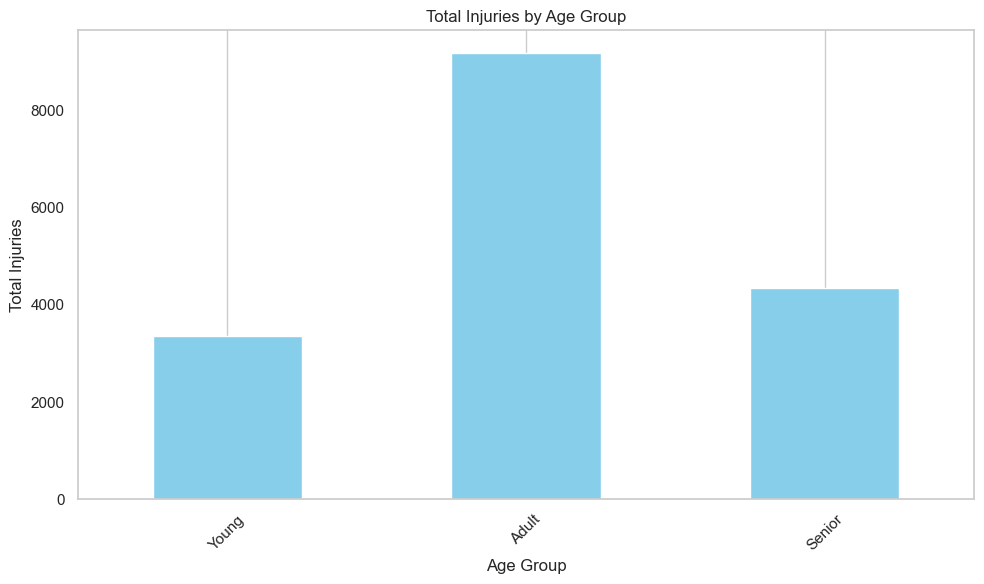

In [393]:
import matplotlib.pyplot as plt


# Group the data by 'AGE_GROUP' and calculate the total injuries for each group
agegroup_total_injuries = Chicagocrush2023.groupby('AGE_GROUP')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
agegroup_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

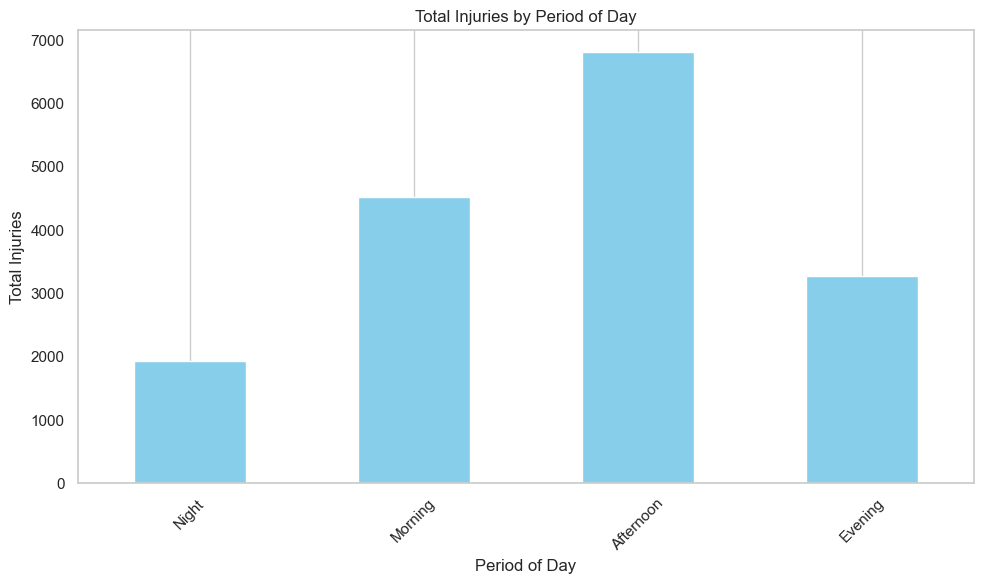

In [394]:
# Time period encoding
Chicagocrush2023.loc[:,'PERIOD_OF_DAY'] = pd.cut(Chicagocrush2023['CRASH_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
# Group the data by 'PERIOD_OF_DAY' and calculate the total injuries for each group
period_of_day_total_injuries = Chicagocrush2023.groupby('PERIOD_OF_DAY')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
period_of_day_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

<Axes: xlabel='PERIOD_OF_DAY', ylabel='count'>

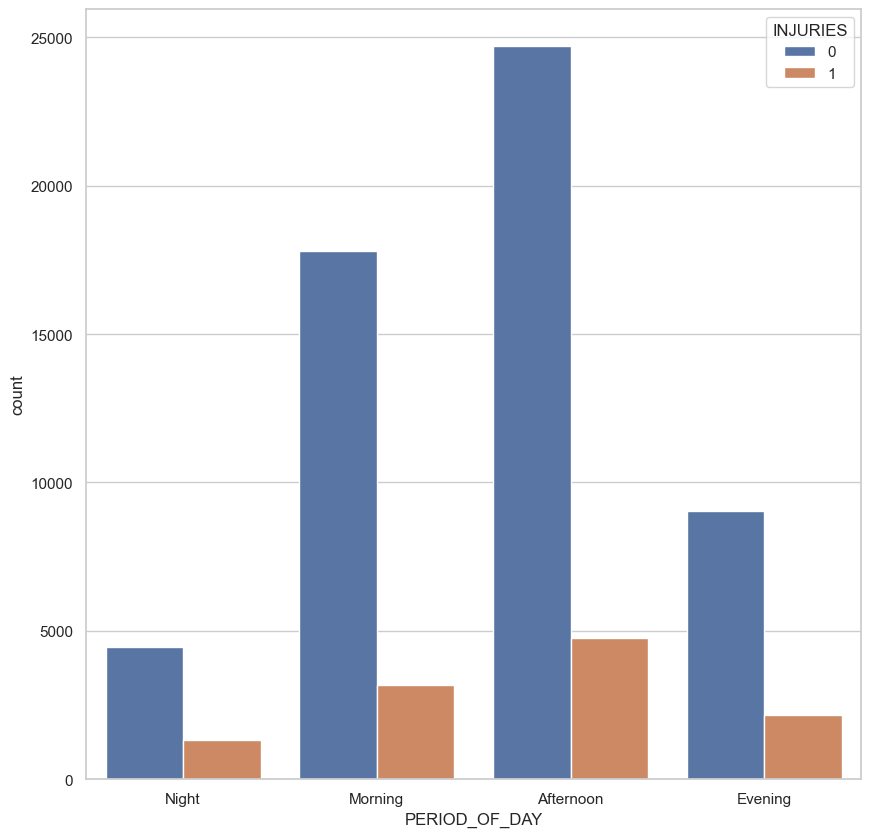

In [395]:
# representing period of day in relation to injuries 
plt.figure(figsize=(10,10))
sns.countplot(x="PERIOD_OF_DAY", hue="INJURIES", data=Chicagocrush2023)

In [396]:
# Convert 'CRASH_DATE' to datetime format
Chicagocrush2023['CRASH_DATE'] = pd.to_datetime(Chicagocrush2023['CRASH_DATE'])

# Extract just the year
Chicagocrush2023['YEAR'] = Chicagocrush2023['CRASH_DATE'].dt.year

# Calculate the age of the vehicle at the time of the accident
Chicagocrush2023['VEHICLE_AGE'] = Chicagocrush2023['YEAR'] - Chicagocrush2023['VEHICLE_YEAR']

# Binning vehicle age
bins = [0, 5, 10, float('inf')]  # Example bins: 0-5 years, 5-10 years, >10 years
labels = ['New', 'Moderately Aged', 'Old']
Chicagocrush2023['VEHICLE_AGE_GROUP'] = pd.cut(Chicagocrush2023['VEHICLE_AGE'], bins=bins, labels=labels)

# Check the DataFrame after creating 'VEHICLE_AGE_GROUP'
print(Chicagocrush2023[['VEHICLE_AGE', 'VEHICLE_AGE_GROUP']].head())

# Group the data by 'VEHICLE_AGE_GROUP' and calculate the total injuries for each group
vehicle_age_group_total_injuries = Chicagocrush2023.groupby('VEHICLE_AGE_GROUP')['INJURIES_TOTAL'].sum()
print(vehicle_age_group_total_injuries)


       VEHICLE_AGE VEHICLE_AGE_GROUP
324            3.0               New
1389          15.0               Old
27431          9.0   Moderately Aged
31253         19.0               Old
40908          7.0   Moderately Aged
VEHICLE_AGE_GROUP
New                4322.0
Moderately Aged    5294.0
Old                6817.0
Name: INJURIES_TOTAL, dtype: float64


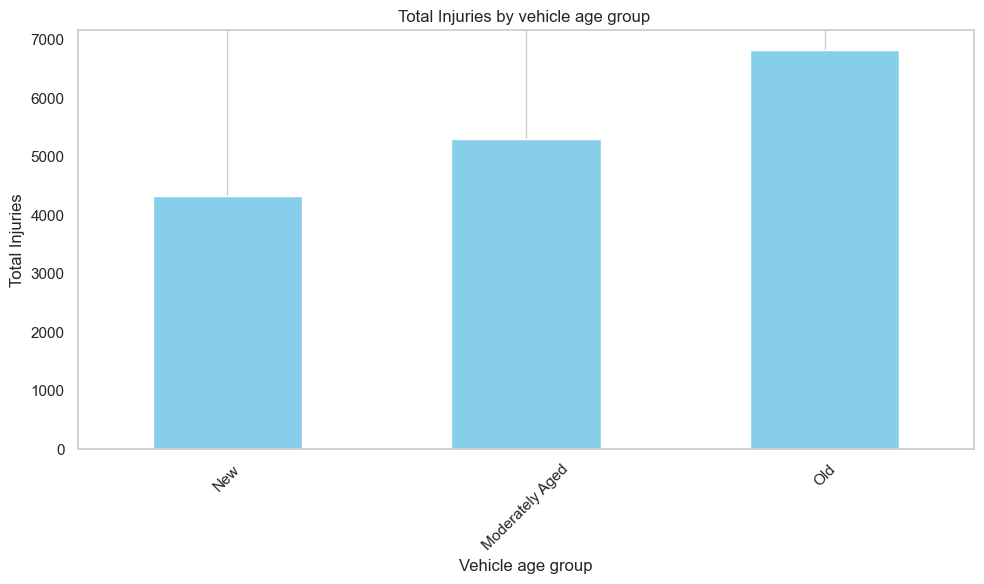

In [397]:

# Plot the bar chart
plt.figure(figsize=(10, 6))
vehicle_age_group_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by vehicle age group ')
plt.xlabel('Vehicle age group')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [318]:
Chicagocrush2023.columns

Index(['CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'UNIT_NO', 'VEHICLE_ID', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_USE', 'INJURIES',
       'AGE_GROUP', 'PERIOD_OF_DAY', 'YEAR', 'VEHICLE_AGE',
       'VEHICLE_AGE_GROUP'],
      dtype='object')

In [319]:
Chicagocrush2023.TRAFFIC_CONTROL_DEVICE.value_counts()

TRAFFIC_CONTROL_DEVICE
No Controls          32454
Traffic Signal       23561
Stop Sign/Flasher     7832
Unknown/Other         4920
Name: count, dtype: int64

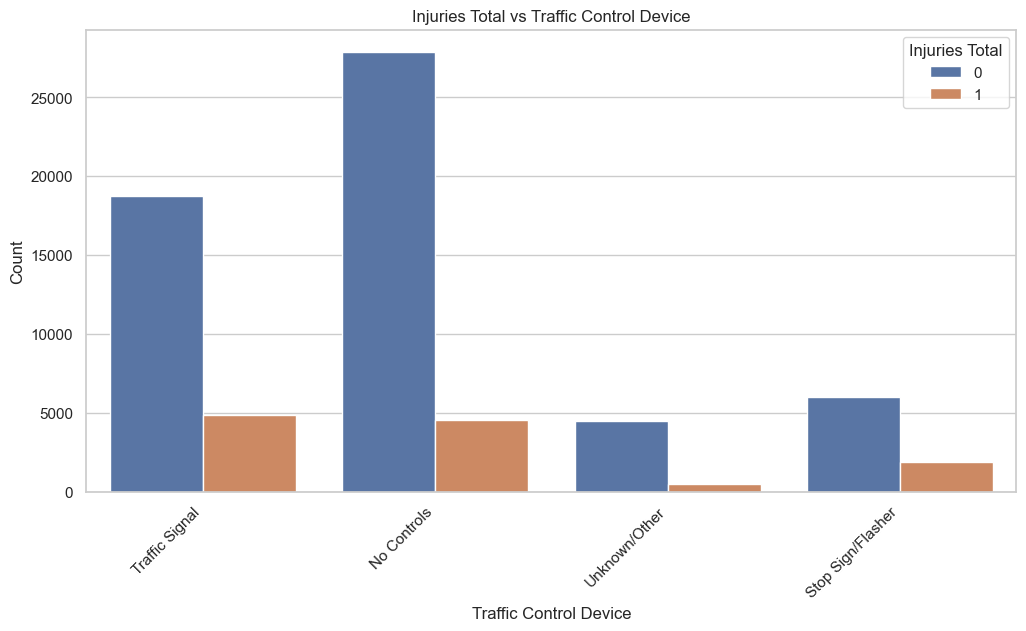

In [399]:
sns.set(style="whitegrid")

# Create a countplot to visualize the distribution of injuries for each traffic control device
plt.figure(figsize=(12, 6))
sns.countplot(x='TRAFFIC_CONTROL_DEVICE', hue='INJURIES', data=Chicagocrush2023)
plt.title('Injuries  vs Traffic Control Device')
plt.xlabel('Traffic Control Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Injuries Total', loc='upper right')
plt.show()

In [321]:
chicagocrush1.WEATHER_CONDITION.value_counts()

WEATHER_CONDITION
CLEAR     439091
RAIN       51701
SNOW       18690
CLOUDY     17678
FOG         2031
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


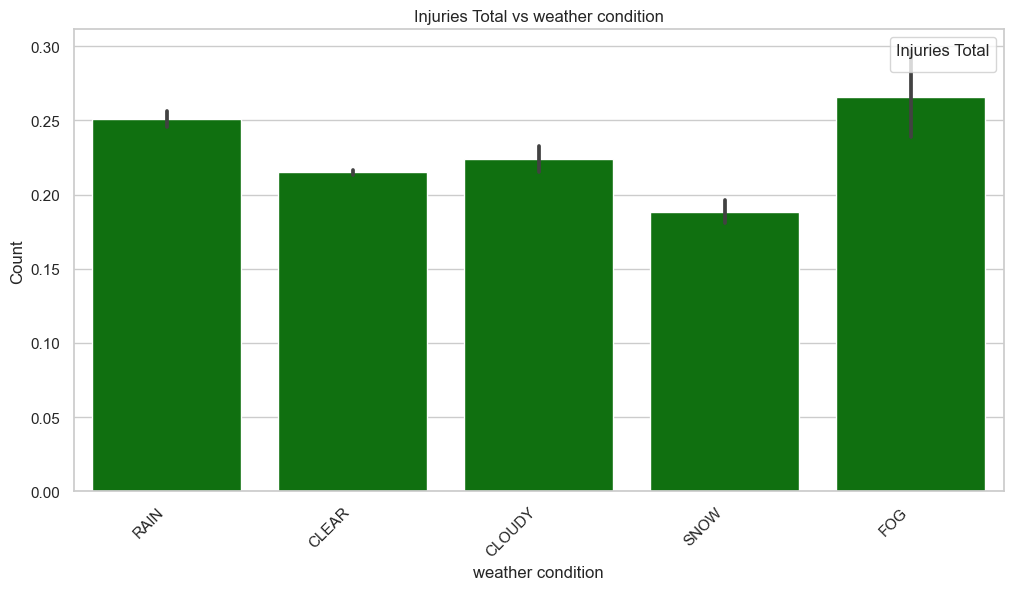

In [401]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WEATHER_CONDITION', y='INJURIES_TOTAL', data=chicagocrush1, color='green')
plt.title('Injuries Total vs weather condition')
plt.xlabel('weather condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Injuries Total', loc='upper right')
plt.show()

In [323]:
Chicagocrush2023.head()

,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_USE,INJURIES,AGE_GROUP,PERIOD_OF_DAY,YEAR,VEHICLE_AGE,VEHICLE_AGE_GROUP
324,NaN,222,NaN,1,32.0,5,NaN,2,18,12,...,EQUINOX,2020.0,NONE,13.0,0,Adult,Morning,2023,3.0,New
1389,NaN,384,NaN,1,24.0,5,NaN,2,13,12,...,ALTIMA,2008.0,UNKNOWN,13.0,0,Young,Afternoon,2023,15.0,Old
27431,NaN,384,NaN,0,36.0,3,NaN,2,7,12,...,CHEROKEE,2014.0,UNKNOWN,13.0,0,Adult,NaN,2023,9.0,Moderately Aged
31253,NaN,1140,NaN,1,24.0,5,NaN,2,12,7,...,850 SERIES,2004.0,UNKNOWN,13.0,0,Young,Evening,2023,19.0,Old
40908,NaN,384,NaN,0,40.0,5,NaN,2,18,7,...,ENCORE,2016.0,UNKNOWN,13.0,0,Adult,Night,2023,7.0,Moderately Aged


In [324]:
Chicagocrush2023.columns



Index(['CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'UNIT_NO', 'VEHICLE_ID', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_USE', 'INJURIES',
       'AGE_GROUP', 'PERIOD_OF_DAY', 'YEAR', 'VEHICLE_AGE',
       'VEHICLE_AGE_GROUP'],
      dtype='object')

In [325]:
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CRASH_RECORD_ID         0 non-null      float64       
 1   CITY                    68767 non-null  int64         
 2   STATE                   0 non-null      float64       
 3   SEX                     68767 non-null  int64         
 4   AGE                     68767 non-null  float64       
 5   AIRBAG_DEPLOYED         68767 non-null  int64         
 6   EJECTION                0 non-null      float64       
 7   INJURY_CLASSIFICATION   68767 non-null  int64         
 8   DRIVER_ACTION           68767 non-null  int64         
 9   DRIVER_VISION           68767 non-null  int64         
 10  PHYSICAL_CONDITION      68767 non-null  int64         
 11  CRASH_DATE              68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT      68767 non-null  float64

In [326]:



# Selecting features (X) and target variable (y)
features = ['AGE', 'CRASH_MONTH','INJURIES', 'VEHICLE_AGE']
target = 'INJURIES_TOTAL'

X = Chicagocrush2023[features]
y = Chicagocrush2023[target]

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (55013, 4)
X_test shape: (13754, 4)
y_train shape: (55013,)
y_test shape: (13754,)


In [327]:
X_test.head()

,AGE,CRASH_MONTH,INJURIES,VEHICLE_AGE
1534701,32.0,11.0,0,14.0
1509069,71.0,10.0,1,7.0
1417074,30.0,7.0,1,0.0
1544931,62.0,12.0,0,1.0
1426461,50.0,3.0,0,3.0


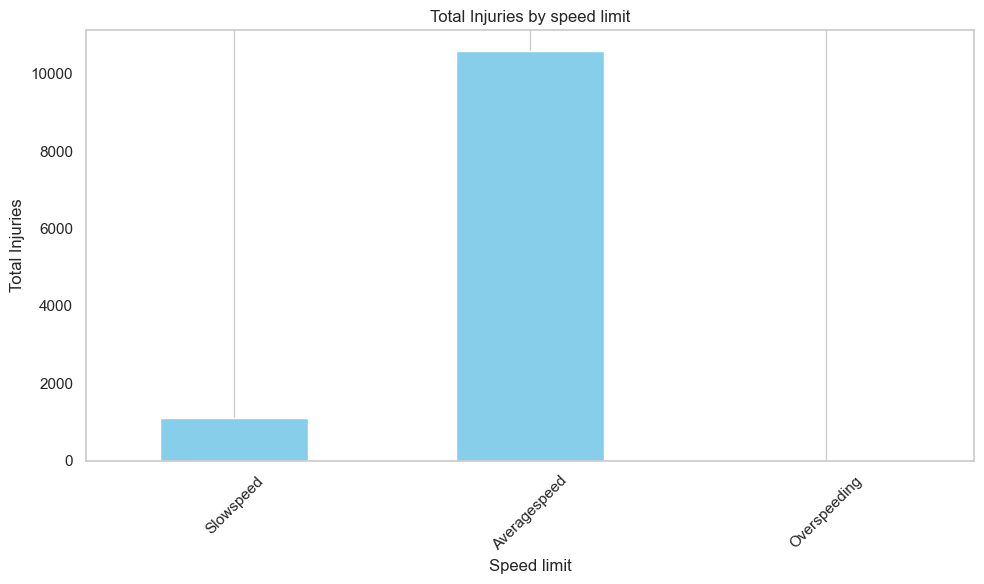

In [328]:
# Time period encoding
Chicagocrush2023.loc[:,'SPEED_LIMIT'] = pd.cut(Chicagocrush2023['POSTED_SPEED_LIMIT'], bins=[0, 25, 50, 100], labels=['Slowspeed', 'Averagespeed', 'Overspeeding'])
# Group the data by 'PERIOD_OF_DAY' and calculate the total injuries for each group
speed_limit_by_total_injuries = Chicagocrush2023.groupby('SPEED_LIMIT')['INJURIES'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
speed_limit_by_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by speed limit')
plt.xlabel('Speed limit')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [329]:
# checking for imbalance
class_distribution = y_train.value_counts(normalize=True)
print(class_distribution)

INJURIES_TOTAL
0.0     0.829786
1.0     0.120771
2.0     0.032956
3.0     0.010543
4.0     0.003708
5.0     0.001345
6.0     0.000418
7.0     0.000200
8.0     0.000109
10.0    0.000055
9.0     0.000036
15.0    0.000018
12.0    0.000018
11.0    0.000018
14.0    0.000018
Name: proportion, dtype: float64


In [330]:
period_of_day_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Unknown': 0}

Chicagocrush2023['PERIOD_OF_DAY'] = Chicagocrush2023['PERIOD_OF_DAY'].map(period_of_day_mapping)

In [410]:


# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11399
         1.0       0.71      0.96      0.81      1659
         2.0       0.40      0.01      0.02       478
         3.0       0.00      0.00      0.00       113
         4.0       0.00      0.00      0.00        65
         5.0       0.00      0.00      0.00        20
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         5
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0

    accuracy                           0.94     13754
   macro avg       0.18      0.16      0.15     13754
weighted avg       0.93      0.94      0.93     13754



C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classif

MODEL
LOGISTIC REGRESSION

In [337]:
# instantiate LogisticRegression 

log_reg = LogisticRegression()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

label_encoder = LabelEncoder()
X_encoded = label_encoder.fit_transform(y)

In [406]:

# Selecting features (X) and target variable (y)
features = ['AGE', 'VEHICLE_YEAR', 'INJURIES', 'VEHICLE_AGE']
target = 'INJURIES_TOTAL'

X = Chicagocrush2023[features]
y = Chicagocrush2023[target]

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     11399
         1.0       0.00      0.00      0.00      1659
         2.0       0.00      0.00      0.00       478
         3.0       0.00      0.00      0.00       113
         4.0       0.00      0.00      0.00        65
         5.0       0.00      0.00      0.00        20
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00         5
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         2

    accuracy                           0.83     13754
   macro avg       0.08      0.10      0.09     13754
weighted avg       0.69      0.83      0.75     13754



C:\Users\Home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [ ]:
KNN MODEL

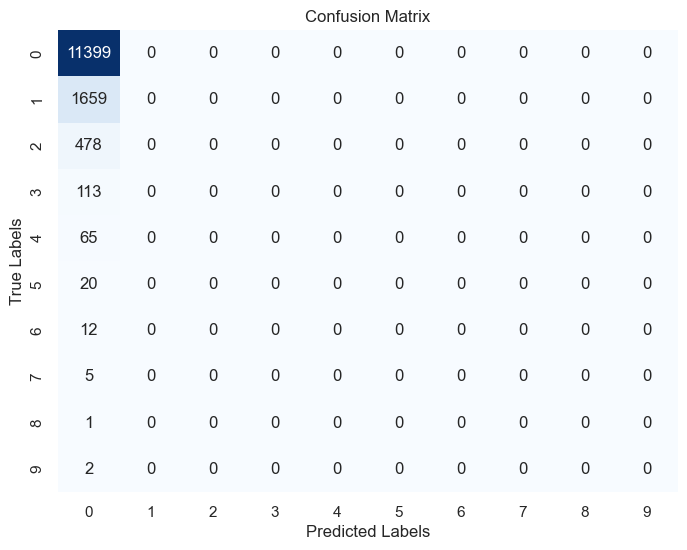

In [336]:


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [414]:
evaluate_classification(log_reg,X_train_tf, X_test_tf, y_train, y_test, label = "Logistic Regression")

NameError: name 'evaluate_classification' is not defined